In [36]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [10]:
quandl.ApiConfig.api_key = '8kfTGxpUBzQLZz4hzQ-p'
df = quandl.get("WIKI/AMZN")
df = df[["Adj. Close"]]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


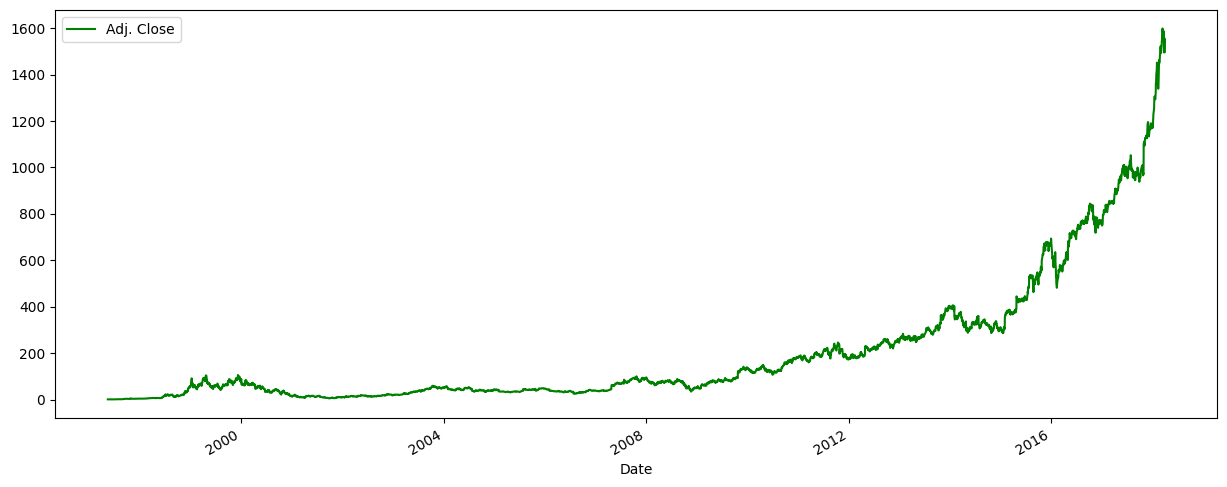

In [11]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [20]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

C:\Users\diego\AppData\Local\Temp\ipykernel_13976\183587925.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)


clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1496.87688041 1535.62607702 1546.98360017 1533.12339218 1553.97202944
 1569.42292694 1571.37417275 1587.53557823 1610.81266815 1600.23988517
 1600.73830121 1580.58956734 1587.80069315 1612.57303121 1627.45128049
 1635.25626371 1642.5310171  1671.19524218 1691.87420589 1681.04691259
 1684.03740888 1674.83261888 1663.54932791 1635.18203154 1679.27594492
 1674.34480742 1634.30185    1582.82713726 1646.77285581 1584.40722218]


(17282.0, 18029.5)

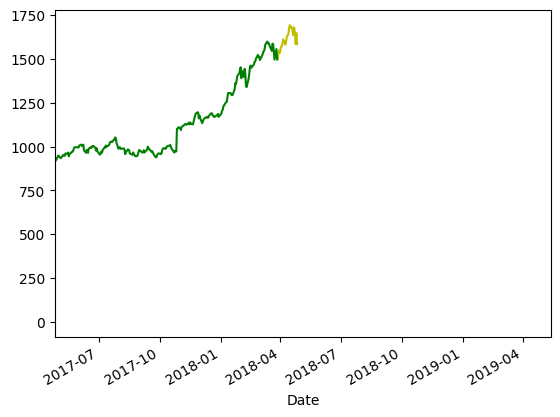

In [37]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))